In [468]:
"""
Python script to scrape Friktion User Data from Bitquery GraphQL API.

"""

import json
import requests
import requests
import traceback
import time

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from os.path import exists

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# GET Prices

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import json
import ccxt

import datetime

cftx = ccxt.ftx(
    {
        "apiKey":"mvnd3WRG56rAP-6MpxFyZ5sN2WnjEO8UsQB6u-6s",
        "secret":"m_m926E36IMlrhCv6bGkLdSdaVegbm5PggpCrFCM"
    }
)

markets = cftx.load_markets()
binance = ccxt.binance()

# 10 days
time_since = datetime.datetime.timestamp(datetime.datetime.now())*1000-10*24*60*60*1000

symbols = {
    "BTC": "BTC/USD", 
    "ETH": "ETH/USD", 
    "SOL": "SOL/USD", 
    "MSOL": "MSOL/USD", 
    "LUNA": "LUNA/USD:USD", 
    "FTT": "FTT/USD", 
    "SRM": "SRM/USD",
    "MNGO": "MNGO/USD",
    "RAY": "RAY/USD", 
    "STEP": "STEP/USD",
    "AVAX": "AVAX/USD"
}
pricedf = {}
for k, symbol in symbols.items():
    data = cftx.fetchOHLCV(symbol, '1m', since=time_since, limit=1)
    tree = pd.DataFrame(data, columns=["time", "open", "high", "low", "close", "volume"])
    data
    print(data)
    pricedf[k] = tree["close"]
    

# Random price hardcodes b/c they aren't traded on FTX

pricedf["USDC"] =pricedf["tsUSDC"] = pricedf["UST"] = 1
pricedf["mSOL"] = pricedf["SOL"]*1.03
pricedf["scnSOL"] = pricedf["SOL"]*1.03
pricedf["SBR"] = 0.04000

tree = pd.DataFrame(pricedf).T.reset_index()

tree.columns = ["symbol", "price"]


[[1647939720000, 42607.0, 42607.0, 42572.0, 42576.0, 49633.068]]
[[1647939720000, 3016.7, 3016.8, 3012.7, 3013.2, 228595.0394]]
[[1647939720000, 91.015, 91.0275, 90.9075, 90.9075, 17860.449075]]
[[1647939720000, 94.275, 94.275, 94.225, 94.225, 0.0]]
[[1647939720000, 93.763, 93.763, 93.667, 93.689, 69226.498]]
[[1647939720000, 45.922, 45.922, 45.871, 45.881, 30936.3335]]
[[1647939720000, 2.545, 2.545, 2.539, 2.541, 4420.078]]
[[1647939720000, 0.15295, 0.15295, 0.152775, 0.1528, 10.69475]]
[[1647939720000, 2.795, 2.795, 2.7921, 2.7921, 564.0065]]
[[1647939720000, 0.1715, 0.1715, 0.1715, 0.1715, 0.0]]
[[1647939720000, 88.448, 88.465, 88.3455, 88.4, 9122.7362]]


In [374]:
deposits = pd.read_csv("friktion_deposit.csv")
withdrawals = pd.read_csv("friktion_withdraw.csv")
claim = pd.read_csv("friktion_claim_withdrawal.csv")
withdrawals_cxl = pd.read_csv("friktion_withdraw_cancel.csv")
deposits_cxl = pd.read_csv("friktion_deposit_cxl.csv")

df_all = pd.concat([withdrawals, claim, withdrawals_cxl, deposits_cxl, deposits], ignore_index=False).reset_index(drop=True)

df_all = pd.merge(df_all, tree, left_on="depositTokenSymbol", right_on="symbol", how='left')


df_all["amount_usdc"] = df_all["amount"]*df_all["price"]

In [359]:
unique_users = df_all.groupby('timestamp').userAddress.nunique().reset_index()#.plot()#.cumsum()


def cum_unique(x):
    return df_all.loc[df_all.timestamp < x.timestamp].userAddress.nunique()

df_all.apply(lambda x: cum_unique(x), axis=1)

KeyboardInterrupt: 

In [ ]:
unique_users = df_all.groupby('timestamp').userAddress.nunique().cumsum().reset_index()

In [375]:
def calculate_tvl_change(x):
    mult = 0
    if x["userAction"] in ["Deposit", "CancelPendingWithdrawal"]:
        mult = 1
    elif x["userAction"] in ["CancelPendingDeposit", "Withdraw"]:
        mult = -1
    
    return x["amount_usdc"]*mult

# df_all["tvl_change"] = 
df_all.apply(lambda x: calculate_tvl_change(x), axis=1)

df_all["tvl_change"] = df_all.apply(lambda x: calculate_tvl_change(x), axis=1)
tvl = df_all.groupby('timestamp')["tvl_change"].sum().cumsum()

tvl = df_all.loc[df_all.userAction!="ClaimPendingWithdrawal"]

tvl = tvl.reset_index(drop=True)

<AxesSubplot:>

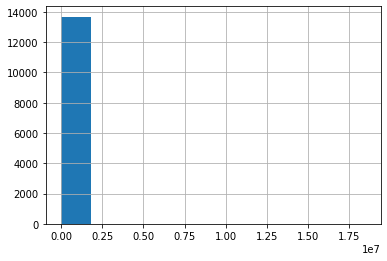

In [460]:
hist.hist()

In [462]:
np.logspace(1, 10)

array([1.00000000e+01, 1.52641797e+01, 2.32995181e+01, 3.55648031e+01,
       5.42867544e+01, 8.28642773e+01, 1.26485522e+02, 1.93069773e+02,
       2.94705170e+02, 4.49843267e+02, 6.86648845e+02, 1.04811313e+03,
       1.59985872e+03, 2.44205309e+03, 3.72759372e+03, 5.68986603e+03,
       8.68511374e+03, 1.32571137e+04, 2.02358965e+04, 3.08884360e+04,
       4.71486636e+04, 7.19685673e+04, 1.09854114e+05, 1.67683294e+05,
       2.55954792e+05, 3.90693994e+05, 5.96362332e+05, 9.10298178e+05,
       1.38949549e+06, 2.12095089e+06, 3.23745754e+06, 4.94171336e+06,
       7.54312006e+06, 1.15139540e+07, 1.75751062e+07, 2.68269580e+07,
       4.09491506e+07, 6.25055193e+07, 9.54095476e+07, 1.45634848e+08,
       2.22299648e+08, 3.39322177e+08, 5.17947468e+08, 7.90604321e+08,
       1.20679264e+09, 1.84206997e+09, 2.81176870e+09, 4.29193426e+09,
       6.55128557e+09, 1.00000000e+10])

In [478]:
from matplotlib.ticker import FormatStrFormatter


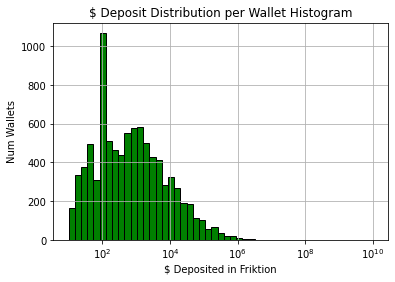

In [632]:
hist = tvl.loc[tvl.userAction=="Deposit"].groupby("userAddress").amount_usdc.sum().reset_index(drop=True)

ax = plt.figure().gca()

hist.hist(bins=np.logspace(1, 10), edgecolor='black', color='green', ax=ax)
plt.xscale('log')

plt.title("$ Deposit Distribution per Wallet Histogram")
plt.ylabel("Num Wallets")
plt.xlabel("$ Deposited in Friktion")

ax.tick_params(axis='x', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))


plt.show()

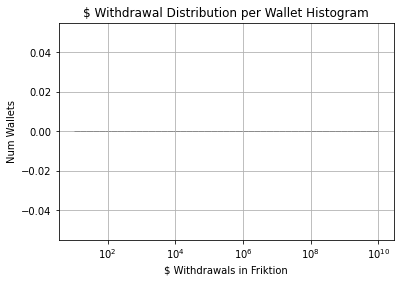

In [633]:
hist = tvl.loc[tvl.userAction=="Withdraw"].groupby("userAddress").amount_usdc.sum().reset_index(drop=True)

ax = plt.figure().gca()

hist.hist(bins=np.logspace(1, 10), edgecolor='black', color='red', ax=ax)
plt.xscale('log')

plt.title("$ Withdrawal Distribution per Wallet Histogram")
plt.ylabel("Num Wallets")
plt.xlabel("$ Withdrawals in Friktion")

ax.tick_params(axis='x', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))


plt.show()

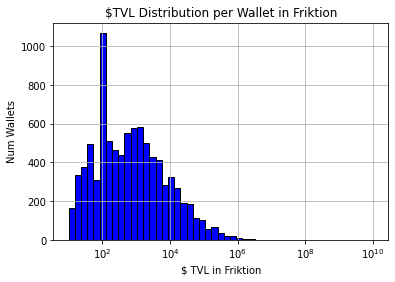

In [634]:
hist = tvl.loc[tvl.userAction=="Deposit"].groupby("userAddress").amount_usdc.sum().sub(tvl.loc[tvl.userAction=="Withdraw"].groupby("userAddress").amount_usdc.sum(), fill_value=0)

ax = plt.figure().gca()

hist.hist(bins=np.logspace(1, 10), edgecolor='black', color='blue', ax=ax)
plt.xscale('log')

plt.title("$TVL Distribution per Wallet in Friktion")
plt.ylabel("Num Wallets")
plt.xlabel("$ TVL in Friktion")

ax.tick_params(axis='x', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))


plt.show()

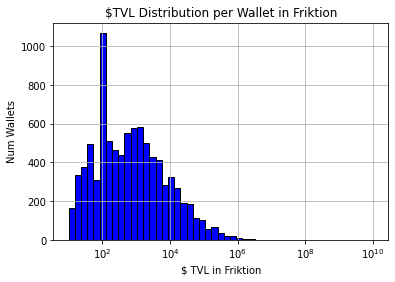

In [635]:
hist = tvl.loc[tvl.userAction=="Deposit"].loc[tvl.amount_usdc>10].groupby("userAddress").amount_usdc.sum().sub(tvl.loc[tvl.userAction=="Withdraw"].groupby("userAddress").amount_usdc.sum(), fill_value=0)

ax = plt.figure().gca()

hist.hist(bins=np.logspace(1, 10), edgecolor='black', color='blue', ax=ax)
plt.xscale('log')

plt.title("$TVL Distribution per Wallet in Friktion")
plt.ylabel("Num Wallets")
plt.xlabel("$ TVL in Friktion")

ax.tick_params(axis='x', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))


plt.show()

In [640]:
qq.index

Float64Index([0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001,
              0.8, 0.9],
             dtype='float64')

In [644]:
qq = pd.DataFrame(hist.quantile(np.linspace(.1, 1, 9, 0))).reset_index()
qq.columns=["percentile", "tvl"]
qq

,percentile,tvl
0,0.1,36.363000
1,0.2,87.055843
2,0.3,117.468489
3,0.4,264.710012
4,0.5,540.954067
5,0.6,1094.901374
6,0.7,2173.719027
7,0.8,5111.430448
8,0.9,18576.746176


In [535]:
tvl["date"] = pd.to_datetime(tvl.timestamp)

<AxesSubplot:title={'center':'Cumulative # Wallets with < $1 in Deposits'}, xlabel='date'>

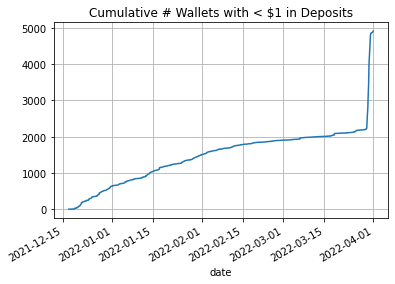

In [536]:
tvl.loc[tvl.userAction=="Deposit"].loc[tvl.amount_usdc < 1].groupby("date").userAddress.count().cumsum().plot(grid=True, title="Cumulative # Wallets with < $1 in Deposits")

<AxesSubplot:title={'center':'Cumulative # Wallets with < $1 in Deposits'}, xlabel='date'>

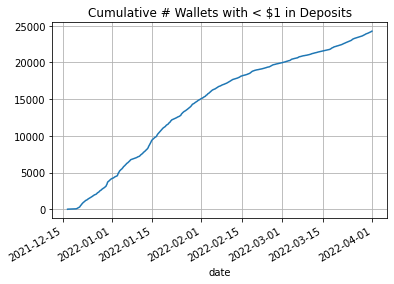

In [537]:
tvl.loc[tvl.userAction=="Deposit"].loc[tvl.amount_usdc > 1].groupby("date").userAddress.count().cumsum().plot(grid=True, title="Cumulative # Wallets with < $1 in Deposits")

# 

Average TVL per user over time

Distribution of Total deposits per unique user

Distribution of Total withdrawals per unique user

Distribution of Current TVL per user



In [605]:
tvl = tvl.sort_values("timestamp")#.loc[tvl.tvl_change>1]

In [606]:
userset = set()
counter = [0]

def is_new_user(x):
    if x not in userset:
        userset.add(x)
        counter[0] += 1
    return counter[0]

tvl["cumUniqueUser"] = tvl.userAddress.apply(lambda x: is_new_user(x))

Text(0.5, 1.0, 'Friktion Cumulative Unique Users > $1 Deposited')

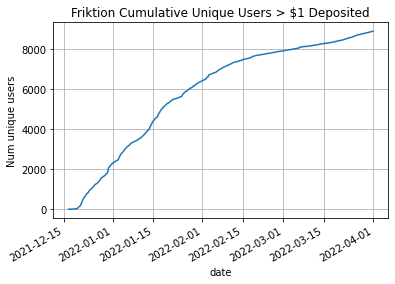

In [607]:
tvl.groupby("date").cumUniqueUser.mean().plot(grid=True)
plt.xticks(rotation=30)

plt.ylabel("Num unique users")

plt.title('Friktion Cumulative Unique Users > $1 Deposited')

In [612]:
tvl["datestr"] = tvl["date"].dt.date

Text(0.5, 1.0, 'Friktion Average $TVL per User over Time')

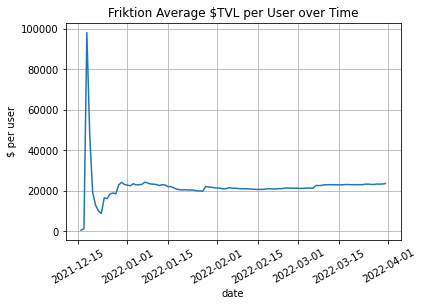

In [615]:
avg_tvl_per_user = tvl.groupby("datestr")["tvl_change"].sum().cumsum()/tvl.groupby("datestr")["cumUniqueUser"].mean()

avg_tvl_per_user.plot(grid=True)

plt.xticks(rotation=30)

plt.xlabel("date")
plt.ylabel("$ per user")

plt.title("Friktion Average $TVL per User over Time")

Text(0.5, 1.0, 'Friktion Average $ TVL per User (excluding wallets < 10USD)')

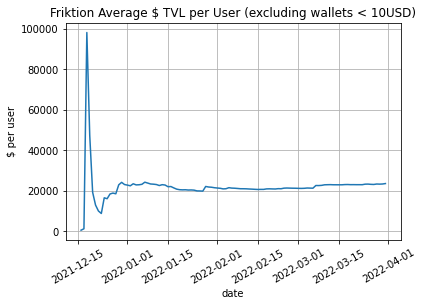

In [614]:
avg_tvl_per_user = tvl.loc[tvl.tvl_change > 10].groupby("datestr")["tvl_change"].sum().cumsum()/tvl.loc[tvl.tvl_change > 10].groupby("datestr")["cumUniqueUser"].mean()

avg_tvl_per_user.plot(grid=True)
plt.xticks(rotation=30)

plt.xlabel("date")
plt.ylabel("$ per user")

plt.title("Friktion Average $ TVL per User (excluding wallets < 10USD)")

In [611]:
tvl.loc[tvl.tvl_change > 10].userAddress.unique().shape

(8911,)

# scratch

In [316]:
zz = pd.merge(unique_users, tvl, on="timestamp")

In [317]:
zz["tvl_per_user"] = zz["amount_usdc"]/zz["userAddress"]

<AxesSubplot:xlabel='timestamp'>

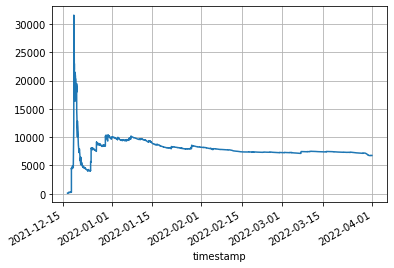

In [318]:
zz["timestamp"] = pd.to_datetime(zz.timestamp)
zz.set_index("timestamp")["tvl_per_user"].plot(grid=True)


In [319]:
df_all.loc[df_all.userAction=="Deposit"].groupby("timestamp")["amount_usdc"].sum()

timestamp
2021-12-16T17:42:09Z       84.489426
2021-12-16T17:47:02Z       84.489426
2021-12-16T20:01:02Z      211.435000
2021-12-16T20:13:51Z      211.435000
2021-12-16T20:23:30Z       42.287000
                            ...     
2022-03-31T23:03:31Z        9.037000
2022-03-31T23:04:38Z      283.060177
2022-03-31T23:05:22Z      180.740000
2022-03-31T23:08:33Z    22587.205799
2022-03-31T23:16:28Z       89.565952
Name: amount_usdc, Length: 29175, dtype: float64

In [295]:
df_all.userAction.unique()

array(['Withdraw', 'ClaimPendingWithdrawal', 'CancelPendingWithdrawal',
       'CancelPendingDeposit'], dtype=object)